# 1. Trình bày lại code trong file pdf

## Import thư viện

In [1]:
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

## Đọc dữ liệu

In [2]:
path_to_file=r'data.csv'
customer_data=pd.read_csv(path_to_file)
customer_data.shape

(200, 5)

## Phân tích tổng quan dữ liệu 

In [3]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [4]:
customer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [5]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Chuyển cột Age thành các nhóm khá nhau 

In [6]:
intervals=[15,20,30,40,50,60,70]
col=customer_data['Age']
customer_data['Age Groups']=pd.cut(x=col,bins=intervals)
customer_data['Age Groups']

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [7]:
customer_data.groupby('Age Groups')['Age Groups'].count()

Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64

In [8]:
customer_data['Age Groups'].value_counts()

Age Groups
(30, 40]    60
(20, 30]    45
(40, 50]    38
(50, 60]    23
(15, 20]    17
(60, 70]    17
Name: count, dtype: int64

## Chuyển cột Age và Genre thành dạng số 

In [9]:
customer_data_oh=pd.get_dummies(customer_data)
customer_data_oh

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,False,True,True,False,False,False,False,False
1,2,21,15,81,False,True,False,True,False,False,False,False
2,3,20,16,6,True,False,True,False,False,False,False,False
3,4,23,16,77,True,False,False,True,False,False,False,False
4,5,31,17,40,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,True,False,False,False,True,False,False,False
196,197,45,126,28,True,False,False,False,False,True,False,False
197,198,32,126,74,False,True,False,False,True,False,False,False
198,199,32,137,18,False,True,False,False,True,False,False,False


## Bỏ cột CustomerID

In [10]:
customer_data.drop('CustomerID',axis=1,inplace=True)

## Trực quan hóa mối quan hệ giữa các cặp biến

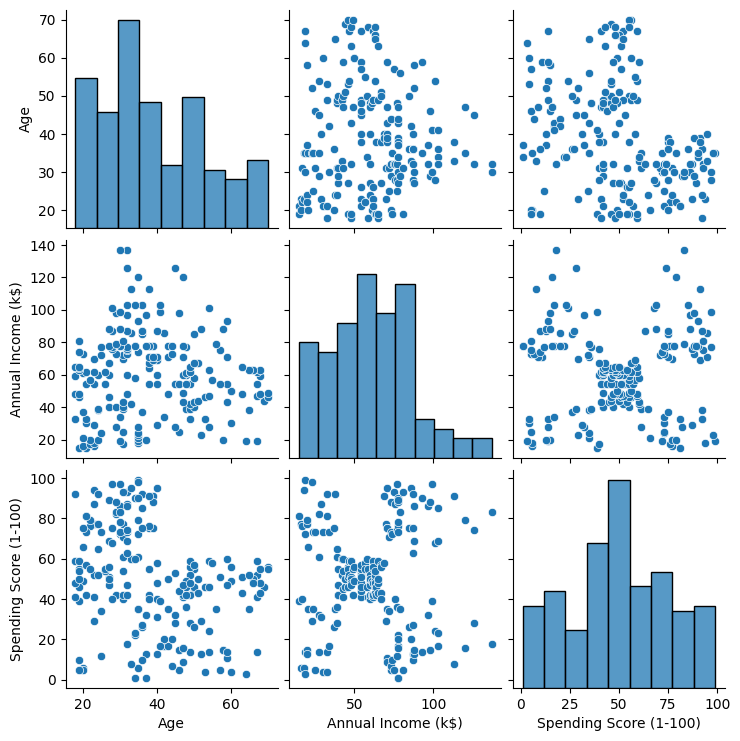

In [11]:
sns.pairplot(customer_data)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

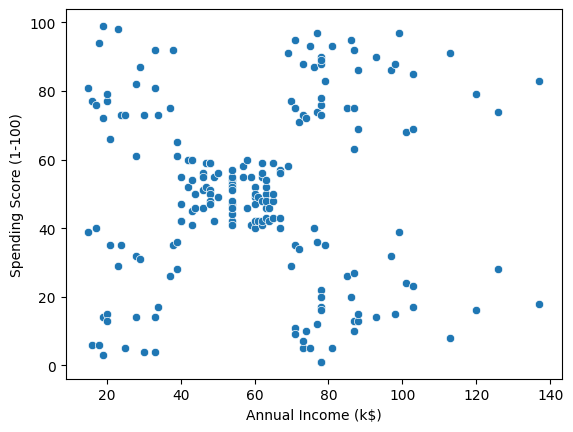

In [12]:
sns.scatterplot(x=customer_data['Annual Income (k$)'],y=customer_data['Spending Score (1-100)'])

## Bỏ cột Age và vẽ dendrogram của selected_data(gồm Anunal Income (k$) và Spending Score (1-100))

In [13]:
customer_data_oh.drop(['Age'],axis=1,inplace=True)
customer_data_oh.shape

(200, 11)

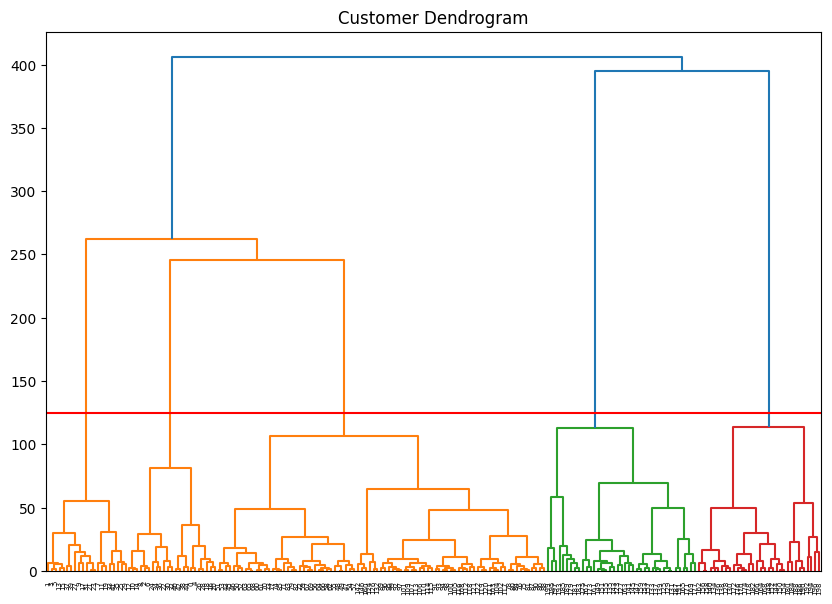

In [14]:
plt.figure(figsize=(10,7))
plt.title("Customer Dendrogram")
selected_data=customer_data_oh.iloc[:,1:3]
clusters=shc.linkage(selected_data,method='ward',metric='euclidean')
shc.dendrogram(Z=clusters)
plt.axhline(y=125,color='r',linestyle='-')
plt.show()


## Phân cụm selected_data bằng hàm AgglomerativeClustering của thư viện sklearn, sửa dụng phương pháp linkage là ``ward``

c:\Users\votua\AppData\Local\Programs\Virtual Enviroment Python\ENV\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


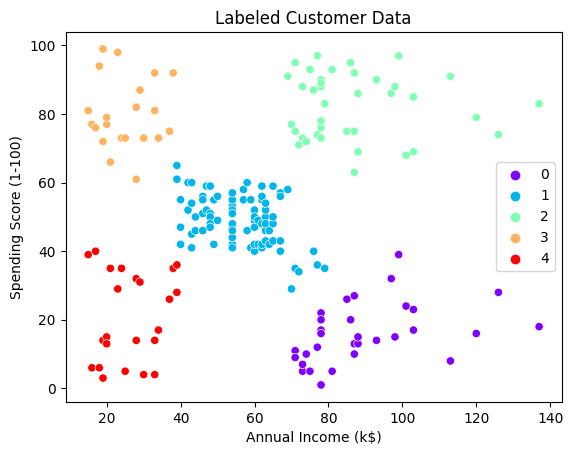

In [15]:
clustering_model = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_
data_labels=clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=selected_data,hue=data_labels,palette='rainbow').set_title('Labeled Customer Data')
plt.show()

# 2. Tự code thuật toán hierarchical

## 2.1 Bottom up

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K):
        self.data = data.values.tolist()
        self.col = data.columns
        self.N = len(data)
        self.K = K
        self.clusters = self.init_clusters()

    def init_clusters(self):
        # Khởi tạo các cụm ban đầu, mỗi điểm dữ liệu là một cụm riêng
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def single_link(self,ci, cj):
        # Tính khoảng cách đơn giữa hai cụm ci và cj
        return np.min([np.linalg.norm(np.array(vi)-np.array(vj)) for vi in ci for vj in cj])

    def find_closest_clusters(self):
        # Tìm cặp cụm có khoảng cách nhỏ nhất
        clusters_ids = list(self.clusters.keys())

        # Liệt kê tất cả các cặp có thể kết hợp
        cluster_combinations = [(clusters_ids[i], clusters_ids[j])
                                for i in range(len(clusters_ids)-1)
                                for j in range(i+1, len(clusters_ids))]

        # Tính khoảng cách giữa các cặp cụm
        distances = [self.single_link(self.clusters[ci],self.clusters[cj])
                     for ci, cj in cluster_combinations]

        # Xác định chỉ số của cặp cụm có khoảng cách nhỏ nhất
        closest_index = np.argmin(distances)
        closest_clusters = cluster_combinations[closest_index]

        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        # Kết hợp hai cụm ci và cj thành một cụm mới
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}
        new_cluster_id = 1

        # Gán lại các cụm không có phải ci hay cj
        for cluster_id, points in self.clusters.items():
            if cluster_id != ci_id and cluster_id != cj_id:
                new_clusters[new_cluster_id] = points
                new_cluster_id += 1

        return new_clusters

    def run_algorithm(self):
        # Thực hiện thuật toán cho đến khi số cụm bằng K
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def print(self):
        # In ra thông tin của các cụm
        for cluster_id, points in self.clusters.items():
            print("Cluster: {}".format(cluster_id))
            for point in points:
                print("    {}".format(point))

    def plot_clusters(self):
        # Vẽ biểu đồ các cụm
        cluster_ids = list(self.clusters.keys())
        num_clusters = len(cluster_ids)
        colors = sns.color_palette('rainbow', n_colors=num_clusters)
        fig, ax = plt.subplots()
        for i, cluster_id in enumerate(cluster_ids):
            points = self.clusters[cluster_id]
            x = [point[0] for point in points]
            y = [point[1] for point in points]
            ax.scatter(x, y, color=colors[i], label=f'Cluster {cluster_id}')
        ax.set_xlabel(self.col[0])
        ax.set_xlabel(self.col[1])

        ax.legend()
        plt.show()


Dưới đây là các bước thực hiện của thuật toán Bottom-Up Clustering (Agglomerative Hierarchical Clustering):

1. Khởi tạo: Truyền dữ liệu ban đầu và số lượng cụm mong muốn vào lớp AgglomerativeHierarchicalClustering để khởi tạo đối tượng. Dữ liệu được chuyển đổi thành danh sách và lưu trong `self.data`, số lượng cụm mong muốn lưu trong `self.K`, và danh sách cụm ban đầu được khởi tạo bằng hàm `init_clusters()`.

2. Khởi tạo cụm ban đầu: Trong hàm `init_clusters()`, danh sách cụm ban đầu được tạo bằng cách gán mỗi điểm dữ liệu là một cụm riêng.

3. Tính khoảng cách giữa cụm: Sử dụng hàm `single_link(ci, cj)` để tính khoảng cách giữa hai cụm ci và cj. Trong mã nguồn, hàm `single_link()` tính khoảng cách nhỏ nhất giữa tất cả các điểm trong hai cụm sử dụng chuẩn Euclide.

4. Tìm cặp cụm gần nhất: Trong hàm `find_closest_clusters()`, tìm cặp cụm có khoảng cách nhỏ nhất bằng cách tính khoảng cách giữa tất cả các cặp cụm có thể kết hợp. Hàm trả về chỉ số của cặp cụm gần nhất.

5. Kết hợp và tạo cụm mới: Trong hàm `merge_and_form_new_clusters(ci_id, cj_id)`, kết hợp hai cụm ci và cj thành một cụm mới. Cụm mới được lưu trong `new_clusters`, và các cụm không phải ci hay cj được gán lại với các chỉ số cụm mới. Danh sách cụm `self.clusters` được cập nhật với cụm mới.

6. Thực hiện thuật toán: Thực hiện thuật toán Bottom-Up Clustering bằng cách lặp lại việc tìm cặp cụm gần nhất và kết hợp cho đến khi số lượng cụm bằng số lượng cụm mong muốn (self.K).

7. Xuất kết quả: Các cụm cuối cùng được in ra bằng phương thức `print()`, và biểu đồ các cụm được vẽ bằng phương thức `plot_clusters()`.

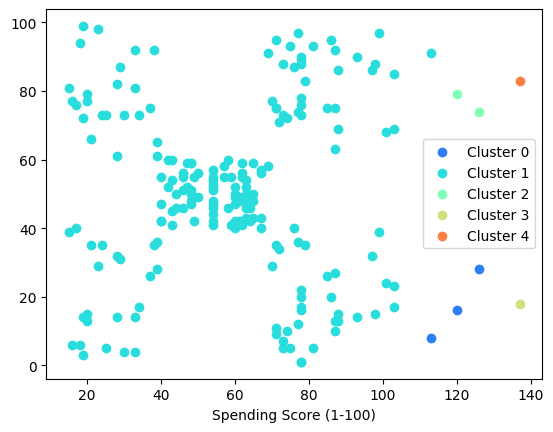

In [17]:
agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(selected_data, 5)
agg_hierarchical_clustering.run_algorithm()
agg_hierarchical_clustering.plot_clusters()

## So sánh với hàm của sklearn

c:\Users\votua\AppData\Local\Programs\Virtual Enviroment Python\ENV\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


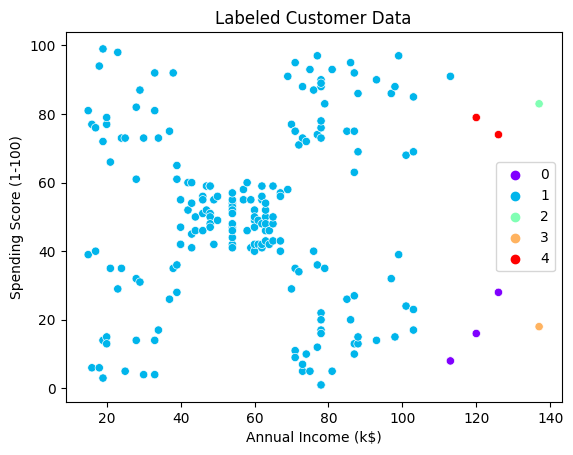

In [18]:
clustering_model = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='single')
clustering_model.fit(selected_data)
clustering_model.labels_
data_labels=clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=selected_data,hue=data_labels,palette='rainbow').set_title('Labeled Customer Data')
plt.show()

Có thể thấy hình dạng của các mảng màu là giống nhau hoàn toàn, có nghĩa là kết quả đúng 100% so với hàm của sklearn

## 2.2 Top down

In [19]:
class DivisiveHierarchicalClustering:
    def __init__(self, data, K):
        self.data = data.values
        self.col = data.columns
        self.N = len(data)
        self.K = K
        self.clusters = self.init_clusters()

    def distance(self, a, b):
        # Tính khoảng cách giữa hai điểm a và b
        return np.linalg.norm(np.array(a) - np.array(b))

    def init_clusters(self):
        # Khởi tạo danh sách cụm ban đầu, mỗi cụm gồm toàn bộ dữ liệu
        clusters = []
        clusters.append(self.data)
        return clusters
    
    def compute_sse(self, cluster):
        # Tính tổng bình phương sai số (SSE) của cụm
        center = np.mean(cluster, axis=0)
        sse = np.sum(np.linalg.norm(cluster - center, axis=1) ** 2)
        return sse

    def find_farthest_point(self, cluster):
        # Tìm điểm xa nhất trong cụm
        farthest_dist = -np.inf
        farthest_point = None

        for point in cluster:
            dist = np.sum([self.distance(point, other_point) for other_point in cluster])
            if dist > farthest_dist:
                farthest_dist = dist
                farthest_point = point

        return farthest_point

    def split_cluster(self):
        # Chia cụm thành hai cụm con
        cluster = self.clusters[-1]
        farthest_point = self.find_farthest_point(cluster)

        cluster_1 = np.array([point for point in cluster if self.distance(point, farthest_point) <= self.distance(farthest_point, np.mean(cluster, axis=0))])
        cluster_2 = np.array([point for point in cluster if point not in cluster_1])

        del self.clusters[-1]
        self.clusters.append(cluster_1)
        self.clusters.append(cluster_2)

        # Sắp xếp lại self.clusters theo SSE tăng dần
        self.clusters = sorted(self.clusters, key=lambda x: self.compute_sse(x))

    def run_algorithm(self):
        # Thực hiện thuật toán cho đến khi số cụm bằng K
        while len(self.clusters) < self.K:
            self.split_cluster()

    def print(self):
        # In ra thông tin của các cụm
        for cluster_id, points in enumerate(self.clusters):
            print("Cluster: {}".format(cluster_id))
            for point in points:
                print("    {}".format(point))

    def plot_clusters(self):
        num_clusters = len(self.clusters)
        colors = sns.color_palette('husl', n_colors=num_clusters)
        fig, ax = plt.subplots()
        for cluster_id in range(num_clusters):
            points = self.clusters[cluster_id]
            x = [point[0] for point in points]
            y = [point[1] for point in points]
            ax.scatter(x, y, color=colors[cluster_id], label=f'Cluster {cluster_id}')

        ax.set_xlabel(self.col[0])
        ax.set_ylabel(self.col[1])
        ax.legend()
        plt.show()


Dưới đây là các bước thực hiện phương pháp Top-Down (Divisive Hierarchical Clustering):

1. Khởi tạo: Truyền dữ liệu ban đầu và số lượng cụm mong muốn vào lớp DivisiveHierarchicalClustering để khởi tạo đối tượng. Dữ liệu được lưu trữ trong `self.data`, số lượng cụm mong muốn lưu trong `self.K`, và danh sách cụm ban đầu được khởi tạo bằng hàm `init_clusters()`.

2. Tính khoảng cách: Sử dụng hàm `distance(a, b)` để tính khoảng cách giữa hai điểm a và b. Trong mã nguồn, hàm `distance()` sử dụng chuẩn Euclide để tính toán khoảng cách.

3. Khởi tạo cụm ban đầu: Trong hàm `init_clusters()`, danh sách cụm ban đầu được tạo bằng cách thêm toàn bộ dữ liệu vào một cụm duy nhất.

4. Tính SSE: Sử dụng hàm `compute_sse(cluster)` để tính tổng bình phương sai số (SSE) của một cụm. Hàm này tính trung tâm của cụm và tính tổng bình phương khoảng cách giữa mỗi điểm dữ liệu trong cụm và trung tâm.

5. Tìm điểm xa nhất: Sử dụng hàm `find_farthest_point(cluster)` để tìm điểm xa nhất trong cụm hiện tại. Hàm này tính tổng khoảng cách từ mỗi điểm trong cụm đến tất cả các điểm còn lại trong cụm, sau đó chọn điểm có khoảng cách lớn nhất làm điểm xa nhất.

6. Chia cụm: Trong hàm `split_cluster()`, cụm hiện tại được chia thành hai cụm con. Điểm xa nhất được tìm thấy bằng cách gọi hàm `find_farthest_point(cluster)`. Dựa vào điểm xa nhất, các điểm trong cụm được chia thành hai nhóm: nhóm gần điểm xa nhất và nhóm còn lại. Hai cụm con mới được tạo và cụm hiện tại được thay thế bằng hai cụm con. Danh sách cụm `self.clusters` được sắp xếp lại theo SSE tăng dần bằng cách sử dụng hàm `sorted()`.

7. Thực hiện thuật toán: Tiếp tục chia cụm cho đến khi đạt được số lượng cụm mong muốn (self.K). Trong mỗi lần chia, cụm có SSE cao nhất được chọn để tiếp tục chia thành hai cụm con.

8. Xuất kết quả: Các cụm cuối cùng được in ra bằng phương thức `print()`, và biểu đồ các cụm được vẽ bằng phương thức `plot_clusters()`.

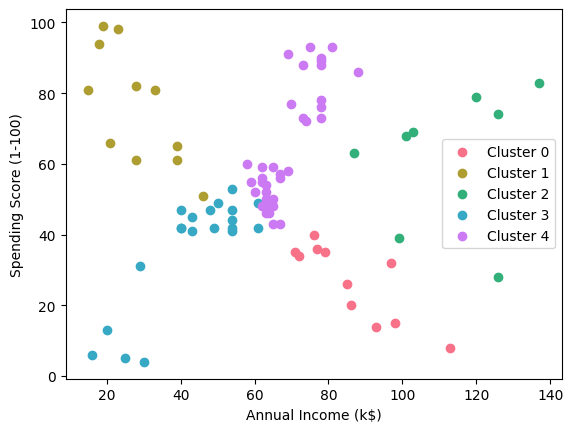

In [20]:
agg_hierarchical_clustering = DivisiveHierarchicalClustering(selected_data, 5)
agg_hierarchical_clustering.run_algorithm()
agg_hierarchical_clustering.plot_clusters()